In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load The Dataset

In [2]:
df = pd.read_csv(r"height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

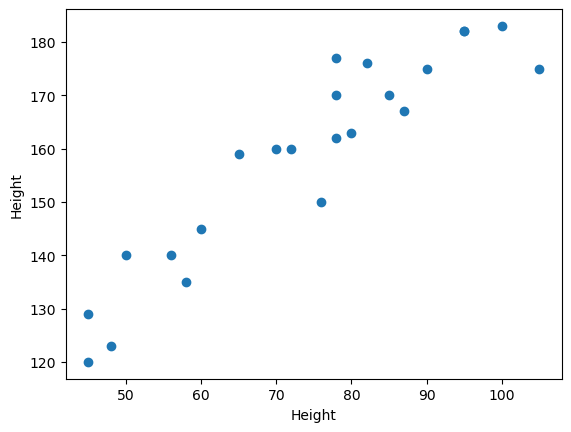

In [3]:
## scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Height")
plt.ylabel("Height")


In [4]:
## correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


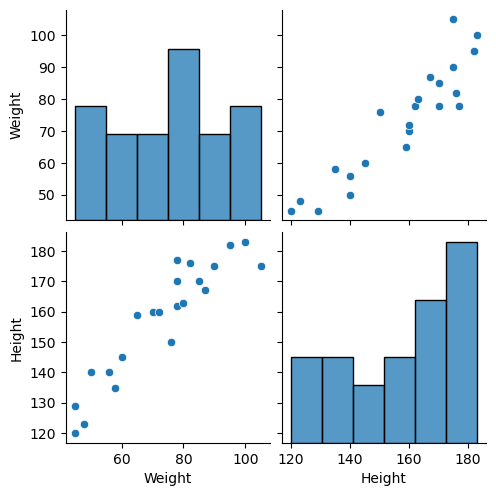

In [5]:
## seaborn for visualization
import seaborn as sns
sns.pairplot(df)

## Independent and dependent feature

In [6]:
X = df[['Weight']] ## independent feature should be in dataframe or 2D array -> because it contains multiple column values in it
# np.array(X).shape ## gives 2D array (23,1)
y = df['Height'] ## dependent feature can be series or 1D array -> because it contains single column value in it
# np.array(y).shape ## gives 1D array (23,)

## Train Test Split

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 42)
# random_state -> if you not specify random_state then it should take random 25% of sample in test data while everytime you spliting
# if you specify random state then, it always take that samples for 25% test data while spliting

In [8]:
X_train.shape  

(17, 1)

In [9]:
X_test.shape

(6, 1)

# Standardization

In [10]:
# convert the bigger values into the smaller values to reach global minima faste
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
## fit_transform (training) -> mean and std.deviation of training sample is used to convert the big values into smaller one

In [11]:
X_train

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [12]:
X_test = scaler.transform(X_test)
## transform (testing) -> mean and std.deviation which are used in fit_transform method, that must be used to convert values in testing dataset
## if fit_transform(X_test) -> then it takes mean and std.deviation of testing sample which is not good because there is DATA LEAKAGE problem
## we don't want that model knows anything about testing data

In [13]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

# Machine Learning Algorithm - Linear Regression (1 Independent feature)

In [14]:
from sklearn.linear_model import LinearRegression

## LinearRegression(parameters - what you give to calculate)

# fit_intercept -> default[True] - calculate the intercept for this model or not
# normalize -> default[False] - it is ignored when fit_intercept = False, if True then normalization happened before regression(if you standardize mannualy then you set it to False, otherwise True for automatically)
# n_jobs -> default[None] - (-1) for using all the processors
# positive -> default[False] - it forces to coefficient must be positive(for True)

## LinearRegression(Attributes - what you get in return)

# coef_, intercept_
# rank_(rankn of matrix X), singular_(singular values of X) -> only availabel when X is dense
# n_features_in_(no of features seen during fit), features_names_in_(names of features seen during fit, only when all the features are strings)

In [15]:
regression = LinearRegression()

In [16]:
regression.fit(X_train,y_train) # here we need X_train as 2D thats why we set X_train as 2d array or dataframe

LinearRegression()

In [17]:
print("coefficient or slope: ", regression.coef_) ## one unit movement in weight then it should 17.298 times movement in height
print("intercept: ",regression.intercept_)

coefficient or slope:  [17.2982057]
intercept:  156.47058823529412


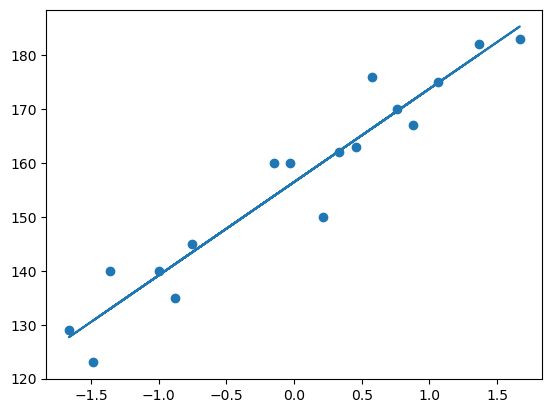

In [18]:
## ploting the graph for training data and best fit line
plt.scatter(X_train,y_train) # for actual training points
plt.plot(X_train,regression.predict(X_train)) # for best fit line which predict the values for x_train samples

# Testing

Prediction of test data

1. predicted height output -> height(i) = intercept + coef_(weight(i))

2. y_pred_test = 156.470 + 17.298(X_test)

In [19]:
y_pred = regression.predict(X_test)

In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [21]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

114.84069295228699
9.665125886795005
10.716374991212605


# R Square

Formula

### R^2 = 1 - SSR/SST

In [22]:
from sklearn.metrics import r2_score

In [23]:
score = r2_score(y_test,y_pred)
print(score)

0.7360826717981276


# Adjusted R Square

Formula

### Adjusted R2 = 1 - [(1-R2)*(N-1)/(N-P-1)]

In [24]:
1 - (1-score) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)

0.6701033397476595

## Linear regression with OLS(Ordinary Least Square)

In [25]:
import statsmodels.api as sm

In [26]:
model = sm.OLS(y_train,X_train).fit()

In [27]:
prediction = model.predict(X_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [28]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Wed, 19 Jun 2024   Prob (F-statistic):                       0.664
Time:                        19:05:53   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\Dell\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## Prediction for new data

In [29]:
# regression.predict([[72]]) 
# here we not done any standardization/normalization so thats why it predicting 1402 as height of 72 kg weight
# but we do it in traininig so it also be done in prediction of new data or test data

regression.predict(scaler.transform([[72]]))

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])